In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

In [3]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
valid_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
train_dir = "C:/Users/rover/OneDrive/Escritorio/Computer_Vision/horse-or-human/train"
valid_dir = "C:/Users/rover/OneDrive/Escritorio/Computer_Vision/horse-or-human/validation"

In [4]:
train_gen = train_datagen.flow_from_directory(train_dir,
                                             target_size=(150,150),
                                             class_mode='binary')

valid_gen = valid_datagen.flow_from_directory(valid_dir,
                                              target_size = (150,150),
                                              class_mode = 'binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [5]:
model=keras.Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.5),
    Conv2D(64,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.5),
    Conv2D(128,(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.5),
    Flatten(),
    Dense(128,activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
          ])

In [6]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer= 'rmsprop',
    metrics=['accuracy'])

In [7]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(patience = 10)
hist = model.fit(
    train_gen,
    epochs = 25,
    batch_size=8,
    callbacks = earlystop,
    validation_data = valid_gen
)

Epoch 1/25
33/33 [==============================] - 13s 218ms/step - loss: 0.6206 - accuracy: 0.7128 - val_loss: 1.7506 - val_accuracy: 0.5000
Epoch 2/25
33/33 [==============================] - 6s 190ms/step - loss: 0.4493 - accuracy: 0.7984 - val_loss: 3.5889 - val_accuracy: 0.5000
Epoch 3/25
33/33 [==============================] - 6s 193ms/step - loss: 0.3204 - accuracy: 0.8608 - val_loss: 0.9657 - val_accuracy: 0.5000
Epoch 4/25
33/33 [==============================] - 7s 195ms/step - loss: 0.2702 - accuracy: 0.8861 - val_loss: 2.9628 - val_accuracy: 0.5000
Epoch 5/25
33/33 [==============================] - 6s 190ms/step - loss: 0.2118 - accuracy: 0.9192 - val_loss: 0.6462 - val_accuracy: 0.6992
Epoch 6/25
33/33 [==============================] - 6s 187ms/step - loss: 0.1948 - accuracy: 0.9348 - val_loss: 1.6712 - val_accuracy: 0.5000
Epoch 7/25
33/33 [==============================] - 6s 185ms/step - loss: 0.1521 - accuracy: 0.9435 - val_loss: 1.0543 - val_accuracy: 0.5898
Epoch

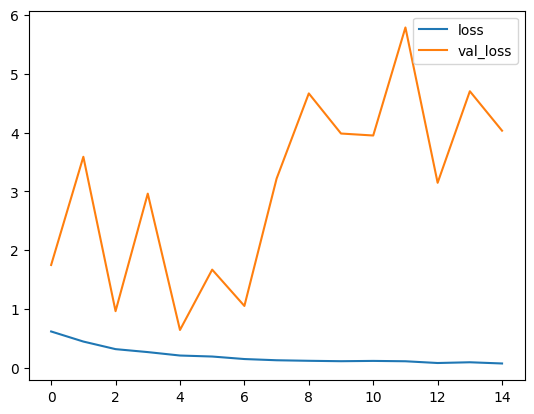

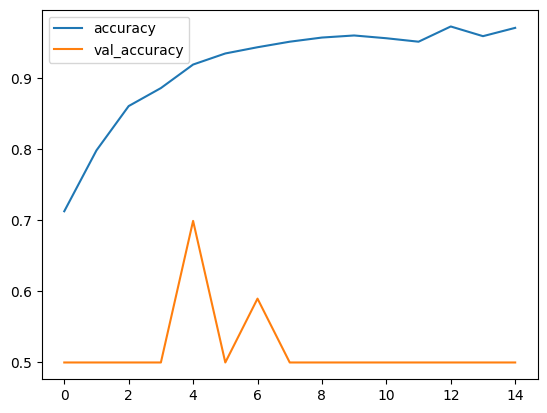

In [8]:
history_frame = pd.DataFrame(hist.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();

In [ ]:
#Having sometroubles with the validation accuracy   ;(